#### **``` 💡This code loads a filtered dataset, removes text columns and the 'Participant ID' column, and then uses the Elbow Method to determine the optimal number of clusters for k-means clustering. The data is clustered, and cluster labels are added to the dataset, with centroids of the clusters also calculated.```**

**1. Importing Libraries:**

>`
from pathlib import Path
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
`

🔸 pathlib.Path is used for file path operations, pandas for data manipulation, numpy for numerical operations, scipy.cluster.hierarchy for hierarchical clustering analysis, and matplotlib.pyplot for plotting graphs.

**2. Determining the current file path and the parent directory path:**

>`
current_file_path = Path(__name__).resolve()
parent_directory_path = current_file_path.parent.parent
`

🔸current_file_path sets the path to the current file.
parent_directory_path sets the path to the parent directory, two levels up.

**3. Defining the input file path:**

>`
input_file_path = parent_directory_path / "data" / "03_Processed" / "03_Filtered_Selected_Features.csv"
`

🔸 input_file_path creates the path to the CSV file containing the data.

**4. Loading data from the CSV file:**

>`
data = pd.read_csv(input_file_path)
`

🔸data loads the data from the CSV file into a pandas DataFrame.

**5. Setting 'Participant ID' as the index:**

>`
data.set_index('Participant ID', inplace=True)
`

🔸set_index sets the 'Participant ID' column as the index of the DataFrame.

**6. Selecting numerical columns for correlation analysis:**

>`
data_numeric = data.select_dtypes(include=['number'])
`

🔸select_dtypes selects only the numerical columns from the DataFrame.


**7. Cleaning the data by replacing infinite and NaN values with the mean of each column:**

>`
data_numeric = data_numeric.replace([np.inf, -np.inf], np.nan)
data_numeric = data_numeric.fillna(data_numeric.mean())
`

🔸replace replaces infinite values with NaN.
fillna replaces NaN values with the mean value of the respective column.

**8. Ensuring there are no more infinite or NaN values:**

>`
assert not data_numeric.isin([np.nan, np.inf, -np.inf]).any().any(), "There are still NaN or infinite values in the data."
`

🔸assert checks that there are no NaN or infinite values in the data. If there are, it raises an error.

**9. Preparing data for clustering:**

>`
X = data_numeric.values
`

🔸X stores the numerical data values as a numpy array.

**10. Defining distance metrics and linkage methods for dendrograms:**

>`
metrics = ['euclidean', 'cityblock', 'cosine', 'chebyshev']
linkage_methods = ['complete', 'average', 'ward']
`

🔸metrics defines the list of distance metrics.
linkage_methods defines the list of linkage methods.

**11. Calculating the number of valid plots based on metric-method conditions:**

>`
valid_plots_count = sum(1 for metric in metrics for method in linkage_methods if not (method == 'ward' and metric != 'euclidean'))
`

🔸valid_plots_count counts the number of valid metric-method combinations (the 'ward' method only works with the 'euclidean' metric).

**12. Determining the number of rows for the subplots:**

>`
num_rows = (valid_plots_count + len(metrics) - 1) // len(metrics)
`

🔸num_rows calculates the number of rows for the subplots, rounding up.

**13. Creating subplots for different metrics and methods:**

>`
fig, axes = plt.subplots(num_rows, len(linkage_methods), figsize=(20, num_rows * 3))
axes = axes.reshape(-1)
`

🔸fig, axes creates the subplots.
axes.reshape(-1) flattens the axes array for easy indexing. 

**14. Drawing dendrograms for each metric-method combination:**

>`
index = 0
for metric in metrics:
    for method in linkage_methods:
        if method == 'ward' and metric != 'euclidean':
            continue
        try:
            Z = linkage(X, method=method, metric=metric)
            dendrogram(Z, ax=axes[index], truncate_mode='level', p=5)
            axes[index].set_title(f'Metric: {metric}, Method: {method}')
            index += 1
        except Exception as e:
            print(f'Error for metric {metric} and method {method}: {e}')
`

🔸The for loop iterates over the metrics and methods, performing hierarchical clustering with linkage, drawing the dendrogram on the respective subplot, setting the plot title to the metric-method combination, and printing an error message if one occurs.

**15. Adjusting the layout to fit all subplots neatly:**

>`
plt.tight_layout()
plt.show()
`

🔸plt.tight_layout adjusts the layout of the plots to fit neatly.
plt.show displays the plots.

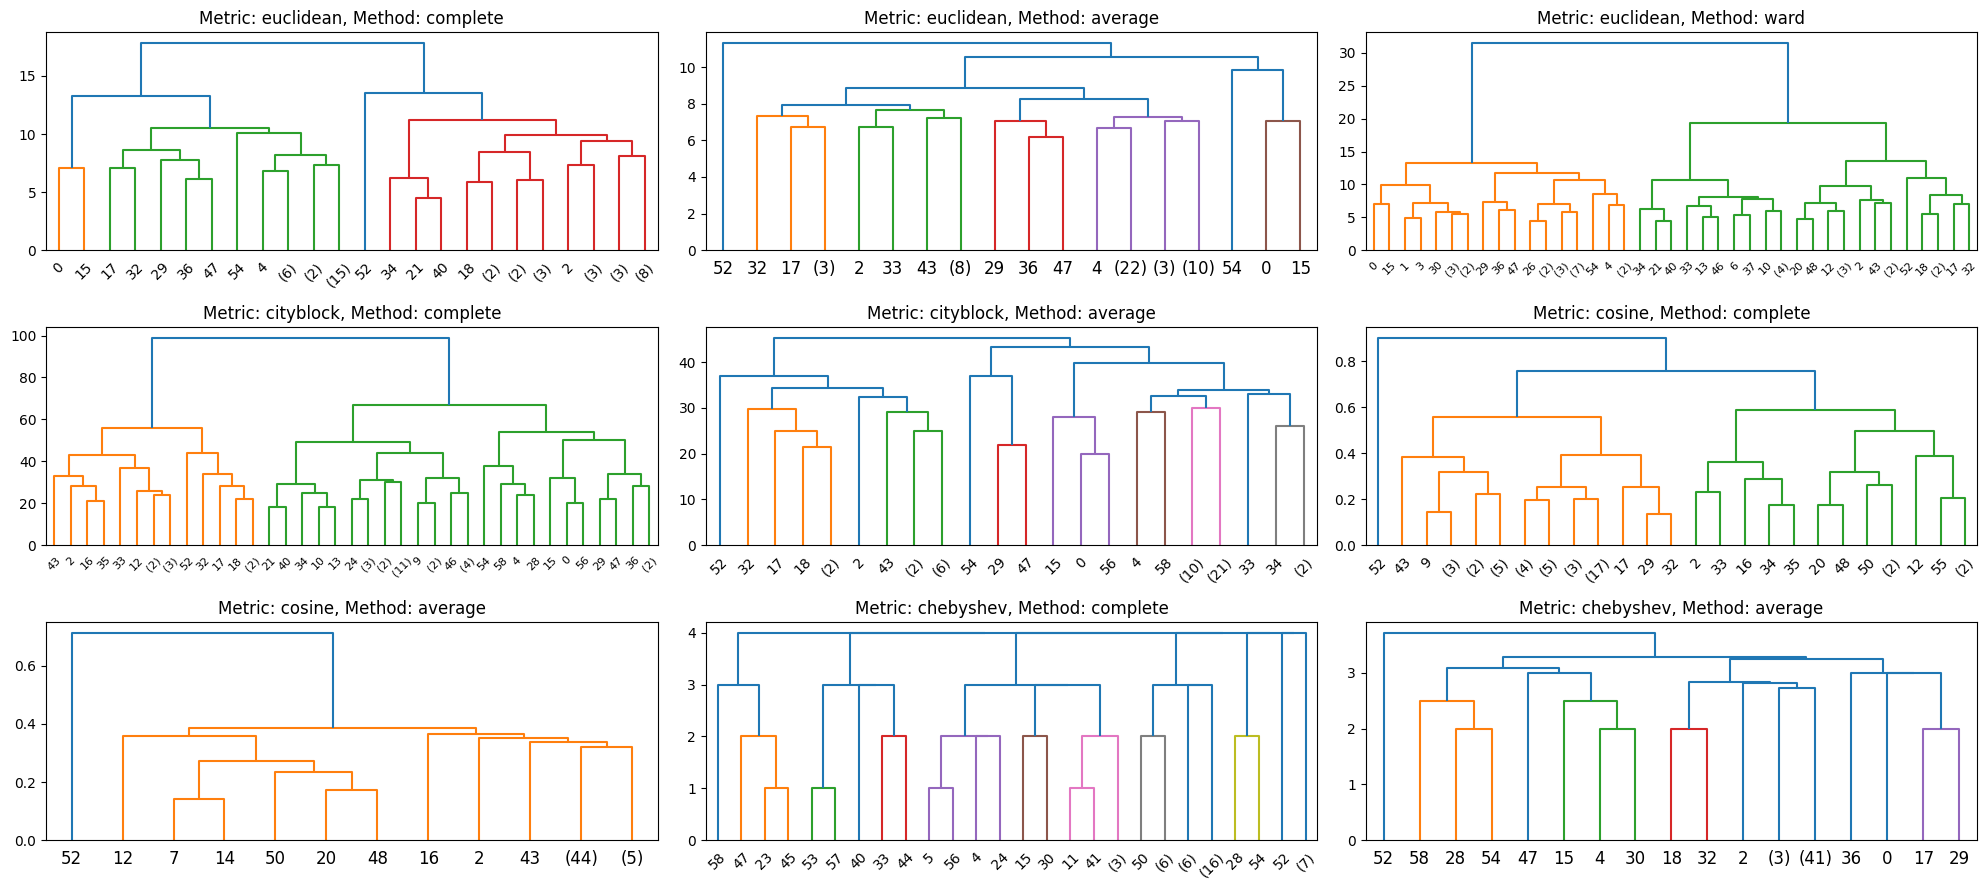

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Determine the current file path and the parent directory path
current_file_path = Path(__name__).resolve()
parent_directory_path = current_file_path.parent.parent

# Define the input file path
input_file_path = parent_directory_path / "data" / "03_Processed" / "03_Filtered_Selected_Features.csv"

# Load data from the CSV file
data = pd.read_csv(input_file_path)

# Set 'Participant ID' as the index
data.set_index('Participant ID', inplace=True)

# Select numerical columns for correlation analysis
data_numeric = data.select_dtypes(include=['number'])

# Clean the data by replacing infinite and NaN values with the mean of each column
data_numeric = data_numeric.replace([np.inf, -np.inf], np.nan)  # Replace infinities with NaN
data_numeric = data_numeric.fillna(data_numeric.mean())  # Replace NaNs with the mean of each column

# Ensure there are no more infinite or NaN values
assert not data_numeric.isin([np.nan, np.inf, -np.inf]).any().any(), "There are still NaN or infinite values in the data."

# Prepare data for clustering
X = data_numeric.values

# Visualization of dendrograms for different distance metrics and number of clusters
metrics = ['euclidean', 'cityblock', 'cosine', 'chebyshev']
linkage_methods = ['complete', 'average', 'ward']  # Removed 'single', Ward is used only with Euclidean distance

# Calculate number of valid plots based on metric-method conditions
valid_plots_count = sum(1 for metric in metrics for method in linkage_methods if not (method == 'ward' and metric != 'euclidean'))

# Determine the number of rows for the subplots
num_rows = (valid_plots_count + len(metrics) - 1) // len(metrics)  # Round up division

# Create plots for different metrics and methods
fig, axes = plt.subplots(num_rows, len(linkage_methods), figsize=(20, num_rows * 3))  # Adjust subplot size accordingly
axes = axes.reshape(-1)  # Flatten the axes array for easy indexing

index = 0
for metric in metrics:
    for method in linkage_methods:
        if method == 'ward' and metric != 'euclidean':
            continue  # Ward can be used only with Euclidean distance
        try:
            # Hierarchical clustering
            Z = linkage(X, method=method, metric=metric)
            # Drawing the dendrogram
            dendrogram(Z, ax=axes[index], truncate_mode='level', p=5)
            axes[index].set_title(f'Metric: {metric}, Method: {method}')
            index += 1
        except Exception as e:
            print(f'Error for metric {metric} and method {method}: {e}')

# Adjust layout to fit all subplots neatly
plt.tight_layout()
plt.show()


#### **``` The provided image consists of several dendrograms generated using hierarchical clustering with different combinations of distance metrics and linkage methods. Here's an interpretation of each dendrogram:```**

**Metric: euclidean, Method: complete**

This dendrogram shows the clustering structure using Euclidean distance and the complete linkage method. It indicates how data points are grouped based on the maximum distance between clusters.

**Metric: euclidean, Method: average**

Using Euclidean distance and the average linkage method, this dendrogram demonstrates the clustering structure where clusters are merged based on the average distance between all pairs of data points in the clusters.

**Metric: euclidean, Method: ward**

This dendrogram uses Euclidean distance and Ward's method, which minimizes the variance within clusters. It's typically used for minimizing the total within-cluster variance.

**Metric: cityblock (Manhattan), Method: complete**

Using the cityblock distance metric and the complete linkage method, this dendrogram shows clustering based on the sum of absolute differences between points.

**Metric: cityblock, Method: average**

This dendrogram combines the cityblock distance metric with the average linkage method, clustering based on the average distance between clusters.

**Metric: cityblock, Method: ward**

Although not shown here, Ward's method with cityblock distance is not valid; hence, this combination is excluded.

**Metric: cosine, Method: complete**

This dendrogram uses the cosine distance metric and complete linkage method, clustering based on the cosine similarity (or angle) between points.

**Metric: cosine, Method: average**

Using the cosine distance metric and the average linkage method, this dendrogram shows how clusters are formed based on the average cosine distance.

**Metric: chebyshev, Method: complete**

This dendrogram uses the Chebyshev distance (maximum distance in any dimension) and complete linkage method, clustering based on the Chebyshev distance.

**Metric: chebyshev, Method: average**

Using the Chebyshev distance metric and the average linkage method, this dendrogram shows clustering based on the average Chebyshev distance between clusters.


*In each dendrogram, the horizontal axis represents the individual data points or clusters, and the vertical axis represents the distance or dissimilarity between clusters. The height at which two clusters are joined indicates the distance between them. Lower heights suggest more similarity between clusters. By examining these dendrograms, one can choose the most appropriate distance metric and linkage method for their specific data and clustering goals.*